# Classification Data Set 

Tien Dat Johny Do - 30087967

In [1]:
#import classes into 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
#Import the data set of breast cancer for our classification data set
#create a directory and dinf the csv file
directory = './Classification Breast Cancer Data.csv'
csv_file = pd.read_csv(directory)
#Drop patient ID coloum
csv_file.iloc[:,1:]

#Print out the file within coloumns
#csv_file

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Y Value will be our Diagnosis Coloum
Yaxis = csv_file.loc[:,['diagnosis']]

#Array for Y axis 
y = Yaxis.values

#Print out the table
#Yaxis

In [4]:
# X Value will be our Everything else 
Xaxis = csv_file.iloc[:,2:]

# Make Data frame into array 
X = Xaxis.values

#Print out the table
#Xaxis

#### kNN Model

This is the website I used for the K-Nearest Neighbors Algorithm:

*https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/*

*https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/*

In [5]:
#The cell under is going to split the training and testing of the data 
#from our classification model. Then it will be scaled and then fitted. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state =1)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)



C:\Users\johny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
classifier.score(X_test,y_test)

0.9473684210526315

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

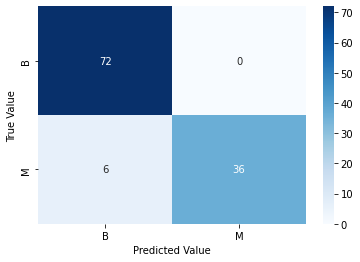

In [9]:
import seaborn as sns
x_axis_labels = ['B','M'] # labels for x-axis
y_axis_labels = ['B','M'] # labels for y-axis

# create seabvorn heatmap with required labels
sns.heatmap(cf_matrix,annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap ='Blues')

plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

### AdaBoost Classifier Model

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [16]:
#From scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


0.922

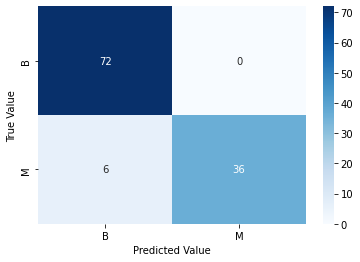

In [20]:
cf_matrix = confusion_matrix(y_test, y_pred)
x_axis_labels = ['B','M'] # labels for x-axis
y_axis_labels = ['B','M'] # labels for y-axis

# create seabvorn heatmap with required labels
sns.heatmap(cf_matrix,annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap ='Blues')

plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

### Gradient Boosting Model

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html


In [21]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\johny\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.956140350877193

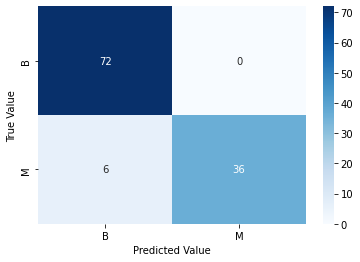

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)
x_axis_labels = ['B','M'] # labels for x-axis
y_axis_labels = ['B','M'] # labels for y-axis

# create seabvorn heatmap with required labels
sns.heatmap(cf_matrix,annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap ='Blues')

plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()